In [1]:
import re, json
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def get_tokens(daide):
    tokens = re.findall(r'[A-Z]+', daide)
    return tokens

In [3]:
eng_arr = []
ref_arr = []
trans_arr = []
f_arr = []
tok_len_arr = []

def read_file():
    count = 0
    total_p = 0
    total_r = 0

    def compute_accuracy(reference, translation):
        trimmed_translated_tokens = get_tokens(translation)
        trimmed_reference_tokens = get_tokens(reference)

        # precision = correct / output-length
        # recall = correct / reference-length
        # f = p * q * 2 / (p + q)
        correct = list((Counter(trimmed_reference_tokens) & Counter(trimmed_translated_tokens)).elements())
        overlap = len(correct)
        # return if denom is 0
        if overlap == 0:
            return 0, 0, 0
        precision = overlap / len(trimmed_translated_tokens)
        recall = overlap / len(trimmed_reference_tokens)
        f = precision * recall * 2 / (precision + recall)
        return round(f, 3), precision, recall

    with open('../data/eng_to_daide_clean.json', 'r', encoding='utf-8') as f:
        data = json.load(f)

        for entry in data:
            count += 1
            msg = entry['msg']
            daide = entry['daide']
            translation = entry['translation']
            accuracy, p, r = compute_accuracy(daide, translation)
            total_p += p
            total_r += r
            eng_arr.append(msg)
            ref_arr.append(daide)
            trans_arr.append(translation)
            f_arr.append(accuracy)
            tok_len_arr.append(len(msg.split(' ')))

    f.close()
        
    print('Average precision:', round(total_p / count, 3))
    print('Average recall:', round(total_r / count, 3))
    return

In [4]:
read_file()
d = {'English': eng_arr, 'Sentence Length': tok_len_arr, 'Reference': ref_arr, 'Translation': trans_arr, 'F-Score': f_arr}
df = pd.DataFrame(data=d)
df

Average precision: 0.485
Average recall: 0.674


,English,Sentence Length,Reference,Translation,F-Score
0,"Hi Italy, hope you're doing well. I'll be figu...",35,PRP (DMZ (FRA ITA) (PIE LYO WES TYS)),PRP (AND (DMZ (ENG PIE) (ITA LYO WES TYS)) (AL...,0.667
1,"Sure, a strong England is always a threat to m...",22,YES (PRP (ALY (GER FRA) VSS (ENG))),PRP (AND (ALY (GER ENG) VSS (NTH SCA)) (XDO ((...,0.476
2,As am I! What direction are you inclined to go...,16,PRP (DMZ (AUS RUS) (GAL)),PRP (AND (ALY (ENG GER) VSS (FRA)) (DMZ (ENG G...,0.400
3,A/T move fast and break things? I’m fleets yo...,28,PRP (ALY (TUR AUS) VSS (RUS ITA)),PRP (AND (XDO ((ENG FLT A) MTO T)) (ALY (ENG A...,0.357
4,And we work to split Italy between the two of ...,19,PRP (SCD (AUS TRI ROM) (TUR NAP TUN)),PRP (AND (ALY (ENG GER) VSS (ITA)) (XDO ((GER ...,0.370
...,...,...,...,...,...
307,Retreat the Italian army from Greece to Albania.,8,PRP (XDO ((ITA AMY GRE) RTO ALB)),PRP (XDO ((ITA ARM GRE) MTO ALB)),0.714
308,Let the French fleet in the English Channel su...,14,PRP (XDO ((FRA FLT ECH) SUP (FRA AMY BEL))),PRP (AND (XDO ((FRA FLT ENG) SUP (FRA ARM BEL)...,0.583
309,Hi germany! Are you up for Sil as a DMZ? It wo...,53,PRP (DMZ (RUS GER) (SIL)),PRP (AND (DMZ (GER SIL)) (ALY (GER ENG) VSS (N...,0.533
310,Hi Turkey! I fully agree that we should stay p...,31,YES (PRP (PCE (AUS TUR))),PRP (AND (SCD (TUR GRE BUL)) (SCD (ENG ROM SER))),0.267


In [5]:
df.sort_values(by=['F-Score'], ascending=False)

,English,Sentence Length,Reference,Translation,F-Score
61,You built a fleet in Edinburgh? Why? I'd think...,15,PRP (XDO ((ENG FLT EDI) BLD)),PRP (XDO ((ENG FLT EDI) BLD)),1.000
301,"We propose an alliance between Germany, Austri...",13,PRP (ALY (GER AUS ITA) VSS (FRA RUS)),PRP (ALY (GER AUS ITA) VSS (FRA RUS)),1.000
265,I hope we can work together against France. I ...,14,PRP (ALY (ENG GER) VSS (FRA)),PRP (ALY (ENG GER) VSS (FRA)),1.000
126,"Also, just out of curiosity, did you advise Ge...",14,PRP (XDO ((GER FLT KIE) BLD)),PRP (XDO ((GER FLT KIE) BLD)),1.000
293,it seems germany and France are teaming up aga...,10,PRP (ALY (GER FRA) VSS (ENG)),PRP (ALY (GER FRA) VSS (ENG)),1.000
...,...,...,...,...,...
174,Do we have anything more we need to talk about...,22,YES (PRP (ALY (ITA AUS) VSS (TUR))),PRP (AND (QRY) (XDO ((ENG FLT ION) MTO LEP))),0.125
185,Mhmm thought we had a non aggression pact ther...,10,YES (PRP (DMZ (ITA AUS) (TYR))),REJ (PRP (AND (SCD (ENG BEL)) (ALY (ENG GER) V...,0.118
173,"If you're all in, I'll just send you a link. ...",40,PRP (ALY (AUS ITA) VSS (TUR)),PRP (AND (XDO ((AUS ARM BLU) MTO WES)) (XDO ((...,0.091
232,"I haven’t been told to do a Lepanto yet, who s...",49,YES (PRP (PCE (AUS ITA))),PRP (AND (DMZ (ENG GER)) (ALY (ENG GER) VSS (F...,0.087


In [12]:
rslt_df = df[df['F-Score'] > 0.99]
rslt_df.shape

(11, 5)

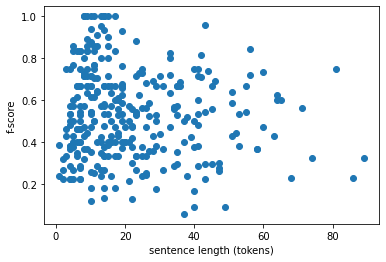

In [6]:
x = np.array(df['Sentence Length'])
y = np.array(df['F-Score'])

plt.scatter(x, y)
plt.xlabel("sentence length (tokens)")
plt.ylabel("f-score")
plt.show()

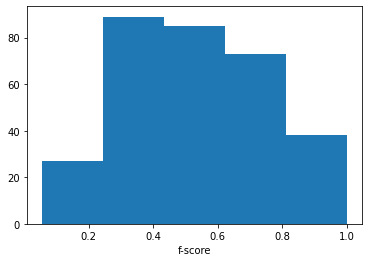

In [13]:
plt.hist(df['F-Score'], bins=5)
plt.xlabel("f-score")
plt.show()

In [7]:
df.sort_values(['F-Score', 'Sentence Length'], ascending=[True, True])

,English,Sentence Length,Reference,Translation,F-Score
216,"Another thought - maybe, we agree that if we w...",37,PRP (PCE (GER ENG)),PRP (AND (ALY (ENG GER) VSS (AUS)) (DMZ (ENG G...,0.056
232,"I haven’t been told to do a Lepanto yet, who s...",49,YES (PRP (PCE (AUS ITA))),PRP (AND (DMZ (ENG GER)) (ALY (ENG GER) VSS (F...,0.087
173,"If you're all in, I'll just send you a link. ...",40,PRP (ALY (AUS ITA) VSS (TUR)),PRP (AND (XDO ((AUS ARM BLU) MTO WES)) (XDO ((...,0.091
185,Mhmm thought we had a non aggression pact ther...,10,YES (PRP (DMZ (ITA AUS) (TYR))),REJ (PRP (AND (SCD (ENG BEL)) (ALY (ENG GER) V...,0.118
174,Do we have anything more we need to talk about...,22,YES (PRP (ALY (ITA AUS) VSS (TUR))),PRP (AND (QRY) (XDO ((ENG FLT ION) MTO LEP))),0.125
...,...,...,...,...,...
126,"Also, just out of curiosity, did you advise Ge...",14,PRP (XDO ((GER FLT KIE) BLD)),PRP (XDO ((GER FLT KIE) BLD)),1.000
152,"So you built F LON and France built F BRE, eh?...",14,PRP (AND (XDO ((ENG FLT LON) BLD)) (XDO ((FRA ...,PRP (AND (XDO ((ENG FLT LON) BLD)) (XDO ((FRA ...,1.000
265,I hope we can work together against France. I ...,14,PRP (ALY (ENG GER) VSS (FRA)),PRP (ALY (ENG GER) VSS (FRA)),1.000
61,You built a fleet in Edinburgh? Why? I'd think...,15,PRP (XDO ((ENG FLT EDI) BLD)),PRP (XDO ((ENG FLT EDI) BLD)),1.000


In [8]:
rslt_df = df[df['F-Score'] < 0.01]
rslt_df.shape

(0, 5)

In [9]:
np.average(df['F-Score'])

0.5353076923076924

In [11]:
from daidepp import create_daide_grammar, daide_visitor

def validate(daide):
    try:
        grammar = create_daide_grammar(level=130, string_type='all')
        parse_tree = grammar.parse(daide)
        daide_visitor.visit(parse_tree)
        return True
    except:
        return False

valid = 0
total = 0

with open('../data/eng_to_daide_clean.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

    for entry in data:
        msg = entry['msg']
        daide = entry['daide']
        translation = entry['translation']
        
        if validate(translation):
            valid += 1
        total += 1

    f.close()

print(f'Valid: {valid}/{total} ({valid/total*100:.2f}%)')

Valid: 98/312 (31.41%)
